In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

In [2]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [3]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import time
import seaborn as sns

In [4]:
import shap

## Load dataset

In [5]:
path_out = r'F:\Codes\joint attention\Nano-particle\output_new_new'
# path_out = r'E:\Other Projects\Nano particles - Dr. Harinda\nanoproject-visuolization-sliit\output_new_new'
# path_out = r''

file_path_features_norm = os.path.join(path_out , 'features_normalized_35.npy')
file_path_labels = os.path.join(path_out , 'label_r_avg_raw.npy')
file_path_features_original = os.path.join(path_out , 'features_raw_35.npy')

with open( file_path_features_original , 'rb') as f:
    features_orig = np.load(f)
with open( file_path_labels , 'rb') as f:
    labels = np.load(f)
with open( file_path_features_norm , 'rb') as f:
    features_norm = np.load(f)

print(features_orig.shape)
print(labels.shape)
print(features_norm.shape)

(3999, 35)
(3999, 1)
(3999, 35)


In [6]:
df_original = pd.DataFrame(features_orig, columns=[ f'feature_{i}' for i in range(35)])
df_norm = pd.DataFrame(features_norm, columns=[ f'feature_{i}' for i in range(35)])

In [7]:
df_original.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,273.0,0.000025,1.0,2.710000e-26,0.0,81.0,119.0,0.0,105.0,229.0,...,8936.0,95.5363,34.169839,24.0,23.0,2.0,8.0,2.5153,2.7535,2.1026
1,273.0,0.000025,2.0,2.780000e-26,0.0,65.0,81.0,1.0,111.0,213.0,...,9090.0,95.5073,34.245992,30.0,35.0,1.0,7.0,2.5335,2.9188,1.8783
2,273.0,0.000025,3.0,7.850000e-26,4.0,204.0,168.0,24.0,306.0,304.0,...,26399.0,96.0506,34.609982,700.0,376.0,0.0,17.0,7.3030,8.4074,4.3813
3,273.0,0.000025,4.0,1.220000e-25,8.0,178.0,246.0,46.0,383.0,282.0,...,40689.0,96.3417,34.742688,1858.0,823.0,0.0,11.0,9.5565,11.0017,5.5250
4,273.0,0.000025,5.0,1.860000e-25,18.0,204.0,269.0,57.0,451.0,328.0,...,62641.0,96.5052,34.859251,3575.0,1350.0,0.0,28.0,9.8630,11.1281,5.5505


In [8]:
df_norm.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,0.0,0.1,0.000000,0.097059,0.000000,0.030440,0.048902,0.000000,0.037433,0.191472,...,0.096273,0.613760,0.265376,0.002188,0.005046,0.666667,0.048780,0.202272,0.207899,0.218424
1,0.0,0.1,0.111111,0.100000,0.000000,0.024427,0.033154,0.001032,0.039725,0.178094,...,0.098170,0.606908,0.308991,0.002735,0.007679,0.333333,0.042683,0.203906,0.221702,0.192378
2,0.0,0.1,0.222222,0.313025,0.002574,0.076663,0.069208,0.024768,0.114209,0.254181,...,0.311345,0.735269,0.517461,0.063816,0.082492,0.000000,0.103659,0.631955,0.680002,0.483029
3,0.0,0.1,0.333333,0.495798,0.005148,0.066892,0.101533,0.047472,0.143621,0.235786,...,0.487339,0.804045,0.593466,0.169386,0.180562,0.000000,0.067073,0.834201,0.896627,0.615837
4,0.0,0.1,0.444444,0.764706,0.011583,0.076663,0.111065,0.058824,0.169595,0.274247,...,0.757697,0.842674,0.660226,0.325918,0.296183,0.000000,0.170732,0.861708,0.907181,0.618798


In [9]:
## check norm and

## Visualize data

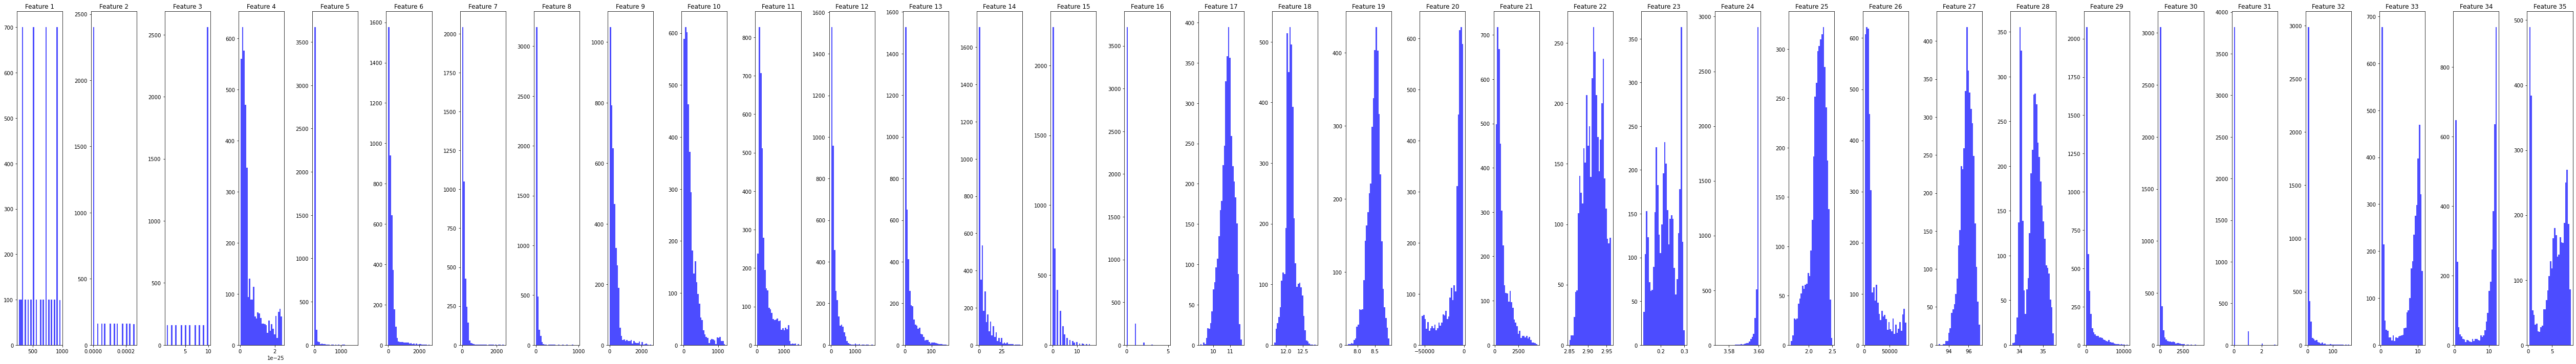

In [9]:
data = features_orig
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()


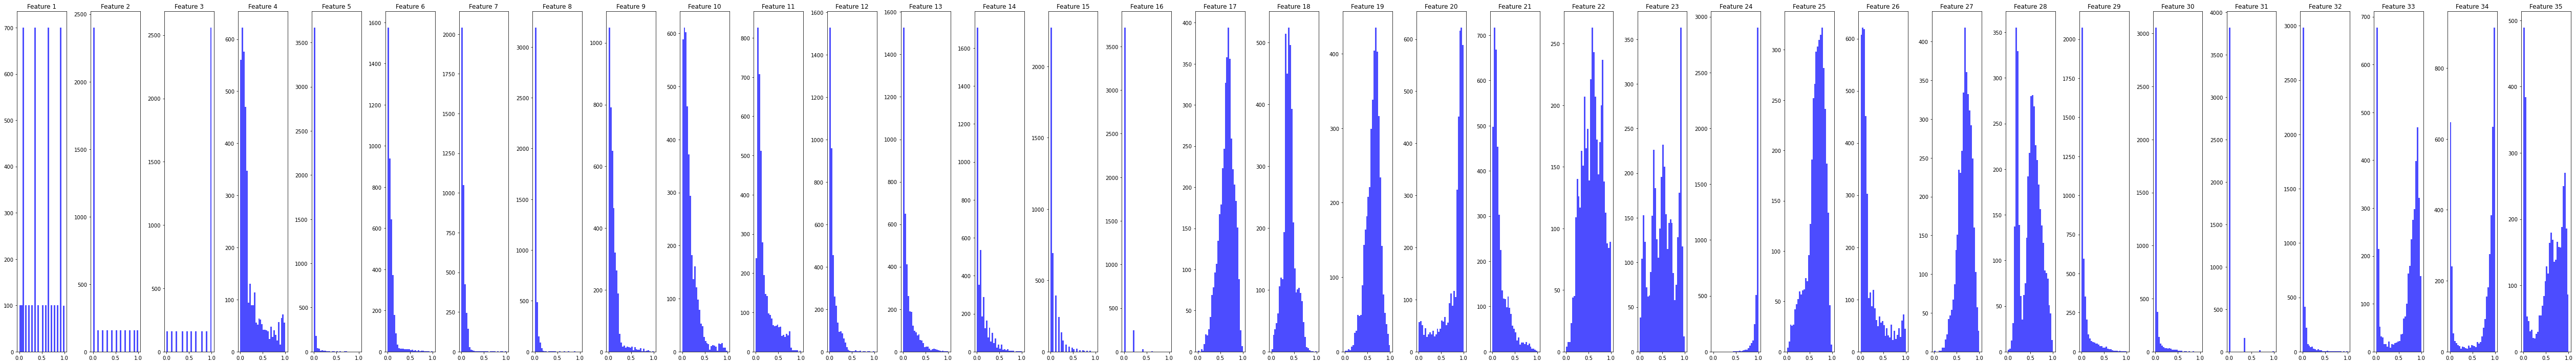

In [10]:
data = features_norm
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

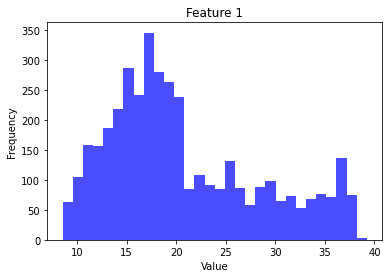

In [11]:
data = labels
plt.hist(data[:, 0], bins=30, color='blue', alpha=0.7)
plt.title('Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Split the dataset into train , test and validation splits

In [12]:
# Split data into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features_norm, labels, test_size=0.2, random_state=42)

print(f"features train shape: {features_train.shape}")
print(f"features test shape: {features_test.shape}") # tmp
print(f"labels train shape: {labels_train.shape}")
print(f"labes test shape: {labels_test.shape}") # tmp

print(f"features train type: {type(features_train)}")
print(f"features test type: {type(features_test)}")
print(f"labels train type: {type(labels_train)}")
print(f"labes test type: {type(labels_test)}")

#test set again split into actual test and validation sets
features_validation, features_test, labels_validation, labels_test = train_test_split(features_test, labels_test, test_size=0.5, random_state=42)

print(f"features validation shape: {features_validation.shape}")
print(f"features test shape: {features_test.shape}")
print(f"labels validation shape: {labels_validation.shape}")
print(f"labes test shape: {labels_test.shape}")

print(f"features validation type: {type(features_validation)}")
print(f"features test type: {type(features_test)}")
print(f"labels validation type: {type(labels_validation)}")
print(f"labes test type: {type(labels_test)}")

features train shape: (3199, 35)
features test shape: (800, 35)
labels train shape: (3199, 1)
labes test shape: (800, 1)
features train type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels train type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>
features validation shape: (400, 35)
features test shape: (400, 35)
labels validation shape: (400, 1)
labes test shape: (400, 1)
features validation type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels validation type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>


In [13]:
def calc_MAPE_Percentage(actual_list , predicted_list):
#     assert len(predicted_list.shape) ==2
#     assert isinstance(predicted_list, list)
    assert len(actual_list.shape) == 2
    tmp=0
    num_samples = actual_list.shape[0]

    if len(predicted_list.shape) == 2:
#         print('con1')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i,0]))/(np.abs(actual_list[i,0]))
    elif len(predicted_list.shape) == 1:
#         print('con2')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i]))/(np.abs(actual_list[i,0]))
    else:
        raise AssertionError
    MAPD = tmp/num_samples
    MAPD_perc = MAPD*100
    return MAPD_perc


## Model Training

## LASSO Regression

LASSO - L1 norm <br>
Makes the weights sparse
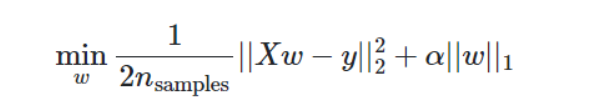

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# X_train, X_test, y_train, y_test = features_train,features_validation,labels_train,labels_validation

lasso = Lasso()

param_grid = {'alpha': np.logspace(-20, 20, 50)} 

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [15]:
grid_search

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-20, 6.55128557e-20, 4.29193426e-19, 2.81176870e-18,
       1.84206997e-17, 1.20679264e-16, 7.90604321e-16, 5.17947468e-15,
       3.39322177e-14, 2.22299648e-13, 1.45634848e-12, 9.54095476e-12,
       6.25055193e-11, 4.09491506e-10, 2.68269580e-09, 1.75751062e-08,
       1.15139540e-07, 7.54312006e-07, 4.94171336e-06, 3....
       7.19685673e+02, 4.71486636e+03, 3.08884360e+04, 2.02358965e+05,
       1.32571137e+06, 8.68511374e+06, 5.68986603e+07, 3.72759372e+08,
       2.44205309e+09, 1.59985872e+10, 1.04811313e+11, 6.86648845e+11,
       4.49843267e+12, 2.94705170e+13, 1.93069773e+14, 1.26485522e+15,
       8.28642773e+15, 5.42867544e+16, 3.55648031e+17, 2.32995181e+18,
       1.52641797e+19, 1.00000000e+20])},
             scoring='neg_mean_squared_error')

In [16]:
param_grid['alpha']

array([1.00000000e-20, 6.55128557e-20, 4.29193426e-19, 2.81176870e-18,
       1.84206997e-17, 1.20679264e-16, 7.90604321e-16, 5.17947468e-15,
       3.39322177e-14, 2.22299648e-13, 1.45634848e-12, 9.54095476e-12,
       6.25055193e-11, 4.09491506e-10, 2.68269580e-09, 1.75751062e-08,
       1.15139540e-07, 7.54312006e-07, 4.94171336e-06, 3.23745754e-05,
       2.12095089e-04, 1.38949549e-03, 9.10298178e-03, 5.96362332e-02,
       3.90693994e-01, 2.55954792e+00, 1.67683294e+01, 1.09854114e+02,
       7.19685673e+02, 4.71486636e+03, 3.08884360e+04, 2.02358965e+05,
       1.32571137e+06, 8.68511374e+06, 5.68986603e+07, 3.72759372e+08,
       2.44205309e+09, 1.59985872e+10, 1.04811313e+11, 6.86648845e+11,
       4.49843267e+12, 2.94705170e+13, 1.93069773e+14, 1.26485522e+15,
       8.28642773e+15, 5.42867544e+16, 3.55648031e+17, 2.32995181e+18,
       1.52641797e+19, 1.00000000e+20])

In [17]:
name = 'LR - lasso '
predictions_list = {'train':None,'test':None,'val':None}

training_start = time.time()
grid_search.fit(features_train, labels_train)
training_end = time.time()

best_params = grid_search.best_params_
print("Best parameters: ", best_params)

best_lasso = grid_search.best_estimator_ # returns the best model with the best hyper-parameters

val_start = time.time()
y_pred_validation = best_lasso.predict(features_validation)
val_end = time.time()
predictions_list['val'] = y_pred_validation

y_pred_train = best_lasso.predict(features_train)
predictions_list['train'] = y_pred_train

test_start = time.time()
y_pred_test = best_lasso.predict(features_test)
test_end = time.time()
predictions_list['test'] = y_pred_test

#metrics for train, test and validation
val_rmse = mean_squared_error(labels_validation, predictions_list['val'], squared = False)
val_mse = mean_squared_error(labels_validation, predictions_list['val'], squared = True)
val_mae = mean_absolute_error(labels_validation, predictions_list['val'])
val_mapd = calc_MAPE_Percentage(labels_validation,predictions_list['val'])
val_r2 = r2_score(labels_validation, predictions_list['val'])
print(f"Validation set with {name} - RMSE: {val_rmse:.10f}, MSE: {val_mse:.10f}, MAE: {val_mae:.10f} ,MAPD: {val_mapd:.8f}, R^2: {val_r2:.10f}")

train_rmse = mean_squared_error(labels_train, predictions_list['train'], squared = False)
train_mse = mean_squared_error(labels_train, predictions_list['train'], squared = True)
train_mae = mean_absolute_error(labels_train, predictions_list['train'])
train_mapd = calc_MAPE_Percentage(labels_train,predictions_list['train'])
train_r2 = r2_score(labels_train, predictions_list['train'])
print(f"Train set with {name} - RMSE: {train_rmse:.10f}, MSE: {train_mse:.10f}, MAE: {train_mae:.10f},MAPD: {train_mapd:.8f}, R^2: {train_r2:.10f}")

test_rmse = mean_squared_error(labels_test, predictions_list['test'], squared = False)
test_mse = mean_squared_error(labels_test, predictions_list['test'], squared = True)
test_mae = mean_absolute_error(labels_test, predictions_list['test'])
test_mapd = calc_MAPE_Percentage(labels_test,predictions_list['test'])
test_r2 = r2_score(labels_test, predictions_list['test'])
print(f"Test set with {name} - RMSE: {test_rmse:.10f}, MSE: {test_mse:.10f}, MAE: {test_mae:.10f},MAPD: {test_mapd:.8f}, R^2: {test_r2:.10f}")

print("Time taken for training: {:.10f} seconds".format(training_end - training_start))
print("Time taken for testing: {:.10f} seconds".format(test_end - test_start))
print("Time taken for validation: {:.10f} seconds".format(val_end - val_start))


Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.5437043987348, tolerance: 14.742803755341527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 300.38378896415617, tolerance: 14.92628627096364
Objective did not converge. You might want to increase the number of iterations. Duality gap: 304.16755604725995, tolerance: 14.854443867859729
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.2078284786049, tolerance: 14.87454703455098
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.2454953627796, tolerance: 14.517933941155492
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.5437043987335, tolerance: 14.742803755341527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 300.38378896415634, tolerance: 14.92628627096364

Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.2454719020229, tolerance: 14.517933941155492
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.54354252381773, tolerance: 14.742803755341527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 300.3835764210314, tolerance: 14.92628627096364
Objective did not converge. You might want to increase the number of iterations. Duality gap: 304.1673989237595, tolerance: 14.854443867859729
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.20763967718557, tolerance: 14.87454703455098
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.2453416647027, tolerance: 14.517933941155492
Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.54264391139117, tolerance: 14.74280375534152

Best parameters:  {'alpha': 3.2374575428176535e-05}
Validation set with LR - lasso  - RMSE: 0.5245955027, MSE: 0.2752004415, MAE: 0.3721285322 ,MAPD: 2.05595986, R^2: 0.9950480316
Train set with LR - lasso  - RMSE: 0.4803879912, MSE: 0.2307726221, MAE: 0.3463467949,MAPD: 1.85072347, R^2: 0.9960052867
Test set with LR - lasso  - RMSE: 0.4845639328, MSE: 0.2348022050, MAE: 0.3480981568,MAPD: 1.73843614, R^2: 0.9961246868
Time taken for training: 7.0484981537 seconds
Time taken for testing: 0.0000000000 seconds
Time taken for validation: 0.0010006428 seconds


Objective did not converge. You might want to increase the number of iterations. Duality gap: 274.2889028317667, tolerance: 18.480465414243948


In [ ]:
## MAPD - test in the paper is not correct. use teh above value
## time taken for testing is also not correct in the paper - use the above




In [18]:
best_lasso

Lasso(alpha=3.2374575428176535e-05)

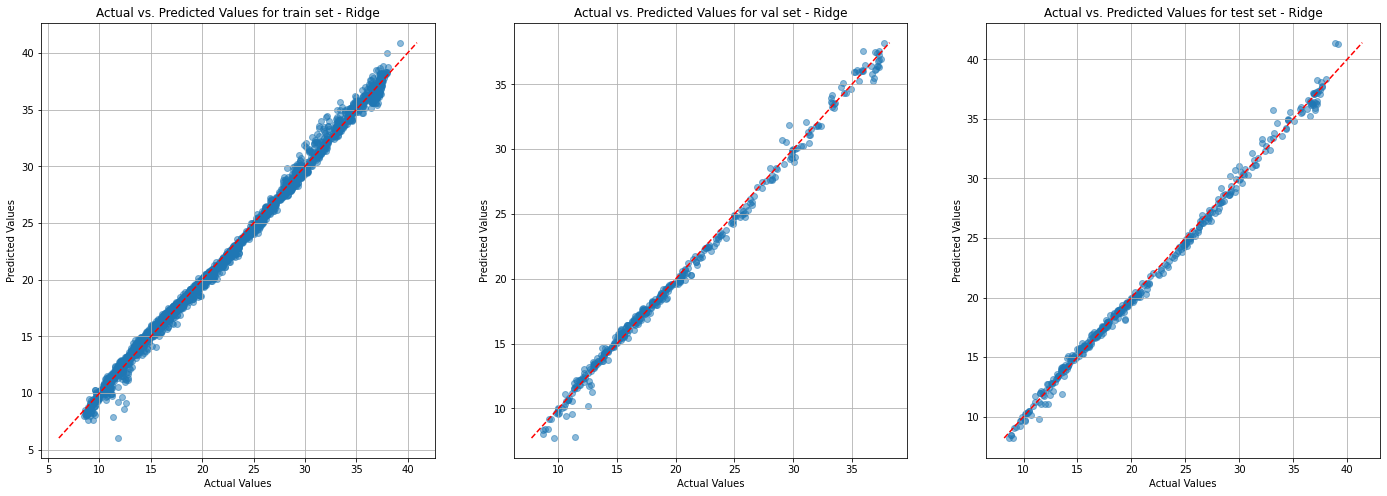

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns
set_d = ['train', 'val','test']
labels_set = [labels_train.squeeze(), labels_validation.squeeze(), labels_test.squeeze()]

for i in range(3):
    axs[i].scatter(labels_set[i], predictions_list[set_d[i]], alpha=0.5)
    axs[i].set_title(f"Actual vs. Predicted Values for {set_d[i]} set - Ridge")
    axs[i].set_xlabel("Actual Values")
    axs[i].set_ylabel("Predicted Values")

    min_val = min(np.min(labels_set[i]), np.min(predictions_list[set_d[i]]))
    max_val = max(np.max(labels_set[i]), np.max(predictions_list[set_d[i]]))
    axs[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    axs[i].grid(True)
plt.show()

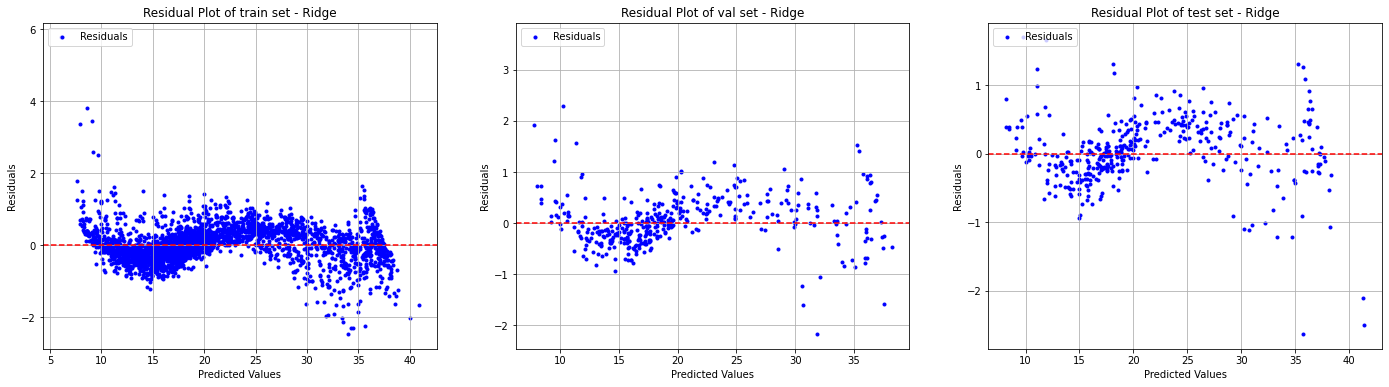

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals

#     plt.figure(figsize=(8, 6))
    axs[i].scatter(predictions_list[set_d[i]], residuals, color='blue', marker='.', label='Residuals')
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - Ridge')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

3199
400
400


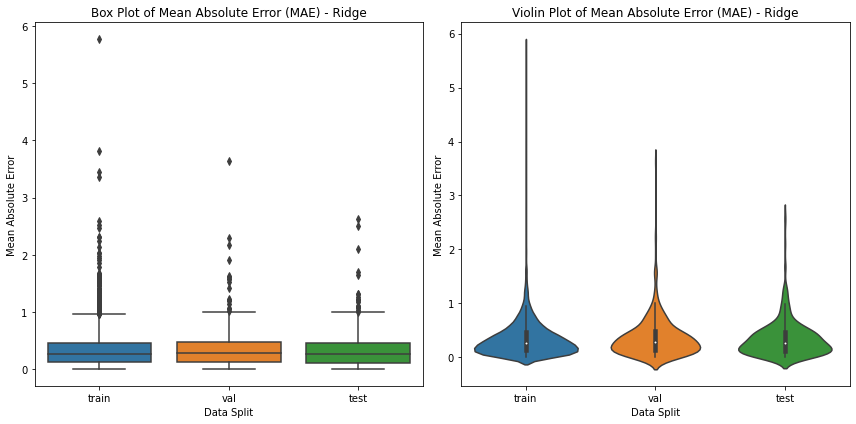

In [21]:
#train, test, val
df_list =[]
for i in range(3):
    num_samples = residuals_set[set_d[i]].shape[0]
    print(num_samples)
    mae_values = [abs(residuals_set[set_d[i]][j]) for j in range(num_samples)]
    df_list.append(pd.DataFrame(mae_values, columns=['MAE']))
    df_list[i]['Data Split'] = set_d[i]

combined_mae_df = pd.concat([df_list[0], df_list[1], df_list[2]])

plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Data Split', y='MAE', data=combined_mae_df)
# sns.boxplot(data=mae_df, y='MAE')
plt.title('Box Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

# Violin plot
plt.subplot(1, 2, 2)
# sns.violinplot(data=mae_df, y='MAE')
sns.violinplot(x='Data Split', y='MAE', data=combined_mae_df)
plt.title('Violin Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

In [22]:
col_names_str = "T, tau, time, Volume, S_100, S_111, S_110, S_311, Curve_1-10, Curve_11-20, Curve_21-30, Curve_31-40, Curve_41-50, Curve_51-60, Curve_61-70, Curve_71-80, Avg_total, Avg_bulk, Avg_surf, Total_E, Formation_E, Avg_bonds, Std_bonds, Max_bonds, Min_bonds, N_bonds, angle_avg, angle_std, FCC, HCP, ICOS, DECA, q6q6_avg_total, q6q6_avg_bulk, q6q6_avg_surf"
cols = col_names_str.split(',')
cols =[c.strip() for c in cols]
# print(cols)
cols_np = np.array(cols)
print(cols_np)
print(cols_np.shape)

['T' 'tau' 'time' 'Volume' 'S_100' 'S_111' 'S_110' 'S_311' 'Curve_1-10'
 'Curve_11-20' 'Curve_21-30' 'Curve_31-40' 'Curve_41-50' 'Curve_51-60'
 'Curve_61-70' 'Curve_71-80' 'Avg_total' 'Avg_bulk' 'Avg_surf' 'Total_E'
 'Formation_E' 'Avg_bonds' 'Std_bonds' 'Max_bonds' 'Min_bonds' 'N_bonds'
 'angle_avg' 'angle_std' 'FCC' 'HCP' 'ICOS' 'DECA' 'q6q6_avg_total'
 'q6q6_avg_bulk' 'q6q6_avg_surf']
(35,)


## Shap Analysis

### Converting numpys to dataframes

In [23]:
pd.options.display.max_columns = None
features_train_df = pd.DataFrame(features_train, columns=cols)
features_train_df.head()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.357143,0.0,1.0,0.121008,0.057915,0.107854,0.020307,0.029928,0.148205,0.102843,0.059438,0.001174,0.000000,0.000000,0.0,0.0,0.666721,0.328632,0.563220,0.881721,0.097807,0.392482,0.266821,0.996049,0.818133,0.115757,0.797784,0.641690,0.074483,0.056823,0.0,0.060976,0.907309,0.952472,0.863790
1,0.071429,0.0,1.0,0.094118,0.000000,0.140549,0.044758,0.033024,0.139037,0.069398,0.059438,0.021139,0.000000,0.000000,0.0,0.0,0.604777,0.326268,0.700351,0.906289,0.061205,0.235131,0.082807,0.988147,0.903067,0.089253,0.816472,0.725791,0.059987,0.049144,0.0,0.085366,0.908386,0.949666,0.944866
2,0.928571,0.0,1.0,0.128151,0.000000,0.113115,0.025280,0.002064,0.130634,0.169732,0.062704,0.027598,0.025641,0.022222,0.0,0.0,0.700475,0.471058,0.726992,0.879346,0.161850,0.741993,0.696828,0.998204,0.597269,0.123762,0.668383,0.442706,0.018324,0.016235,0.0,0.012195,0.728838,0.827630,0.562978
3,0.928571,0.0,1.0,0.115126,0.000000,0.051484,0.020721,0.004128,0.081742,0.141304,0.103201,0.042866,0.025641,0.044444,0.0,0.0,0.677566,0.433393,0.627610,0.892252,0.151954,0.756526,0.743001,0.992816,0.549163,0.110572,0.647262,0.485310,0.017322,0.002852,0.0,0.000000,0.664866,0.803323,0.380958
4,0.928571,0.0,1.0,0.006261,0.000000,0.001879,0.010361,0.004128,0.004966,0.051003,0.036577,0.014680,0.019231,0.000000,0.0,0.0,0.267679,0.425648,0.298146,0.994267,0.021339,0.698753,0.959020,0.985273,0.661096,0.005949,0.275268,0.149671,0.000000,0.000000,0.0,0.000000,0.047440,0.050969,0.058316


In [24]:
features_test_df = pd.DataFrame(features_test, columns=cols)
features_test_df.head()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.642857,0.0,1.0,0.137815,0.034106,0.067644,0.030253,0.009288,0.141329,0.089465,0.094056,0.044040,0.025641,0.044444,0.000000,0.0,0.699216,0.434861,0.629781,0.867766,0.144070,0.586346,0.534771,0.970905,0.708974,0.132962,0.709989,0.586149,0.057617,0.015358,0.0,0.000000,0.830782,0.930319,0.641046
1,0.071429,0.0,1.0,0.113025,0.000000,0.197670,0.048902,0.000000,0.198625,0.000836,0.041803,0.037581,0.000000,0.000000,0.000000,0.0,0.634551,0.331812,0.739686,0.887331,0.070192,0.262313,0.068921,0.719828,0.892165,0.107702,0.846525,0.957676,0.097912,0.000000,0.0,0.000000,0.944114,0.984828,0.971144
2,0.928571,0.0,1.0,0.044118,0.000000,0.003382,0.012433,0.007224,0.010313,0.113712,0.081646,0.029360,0.070513,0.022222,0.000000,0.0,0.457858,0.262922,0.443878,0.959670,0.078529,0.798152,0.934918,0.971264,0.556526,0.040876,0.481406,0.177720,0.000000,0.000000,0.0,0.000000,0.024286,0.024908,0.031550
3,1.000000,0.9,0.0,0.021807,0.000000,0.001127,0.003315,0.002064,0.009549,0.078595,0.045069,0.022901,0.089744,0.111111,0.058824,0.0,0.197612,0.026333,0.000000,0.979421,0.037220,0.707365,0.993283,0.946121,0.330810,0.018708,0.444691,0.093384,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.004378
4,0.928571,0.0,1.0,0.158403,0.003218,0.090192,0.018235,0.006192,0.123377,0.184783,0.095363,0.032883,0.070513,0.044444,0.058824,0.0,0.719160,0.418718,0.648071,0.851018,0.195826,0.774468,0.692651,0.993894,0.675868,0.152926,0.685985,0.500107,0.027806,0.018210,0.0,0.036585,0.716461,0.814078,0.491552


### SHAP value calculation

In [26]:
type(best_lasso)

sklearn.linear_model._coordinate_descent.Lasso

In [27]:
# features_train
train_feature_sample_df = shap.utils.sample(features_train_df, 2500)
print(train_feature_sample_df.shape)

LR_model = best_lasso

# explainer__ = shap.Explainer(LR_model.predict, train_feature_sample_df) #this was probly from chatgpt!
explainer__ = shap.Explainer(LR_model, train_feature_sample_df)
shap_values = explainer__(features_test_df)
print(shap_values.feature_names)

(2500, 35)
['T', 'tau', 'time', 'Volume', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_total', 'Avg_bulk', 'Avg_surf', 'Total_E', 'Formation_E', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf']


### SHAP to Dataframe

In [28]:
#shap values converted to a dataframe

print(type(shap_values))
print(type(shap_values.values))
shap_values_df = pd.DataFrame(shap_values.values, columns=cols)
shap_values_abs_df = shap_values_df.abs()
shap_values_df.head()

<class 'shap._explanation.Explanation'>
<class 'numpy.ndarray'>


,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.082375,-0.175127,-0.027745,-3.360102,0.195794,-0.044394,-0.0,0.010953,0.516802,-0.902562,-1.630869,-0.685659,-0.106002,0.026531,-0.036224,-0.004026,0.641084,-0.084573,0.001465,3.296292,-0.018929,-0.017997,-0.000678,0.004440,0.0,0.217907,0.022143,0.083066,0.013786,-0.011635,0.001814,0.060024,0.859734,-0.673193,-0.177215
1,-0.173646,-0.175127,-0.027745,-4.051903,-0.067383,0.882603,-0.0,0.017133,1.351790,-1.923059,-2.320418,-0.760409,-0.128460,0.041735,-0.036224,-0.004026,-0.126814,0.308282,-0.098574,3.825626,-0.057815,0.243292,0.012760,-0.135438,0.0,0.264156,0.133055,0.459912,0.002469,-0.015489,0.001814,0.060024,1.390269,-0.840987,-0.854221
2,0.210385,-0.175127,-0.027745,-5.974875,-0.067383,-0.502534,-0.0,0.012326,-1.392538,-0.623370,-1.794637,-0.855545,-0.066700,0.034133,-0.036224,-0.004026,-2.225030,0.570910,0.170680,5.782678,-0.053426,-0.188789,-0.012222,0.004641,-0.0,0.386511,-0.163543,-0.331211,0.029968,-0.015489,0.001814,0.060024,-2.915640,2.113912,1.072818
3,0.242387,0.470834,0.122681,-6.597496,-0.067383,-0.518609,-0.0,0.015760,-1.403671,-1.027717,-2.277321,-0.930295,-0.049857,0.003725,-0.002683,-0.004026,-5.315436,1.472860,0.574714,6.317042,-0.075170,-0.115582,-0.013906,-0.009367,-0.0,0.427101,-0.193368,-0.416755,0.029968,-0.015489,0.001814,0.060024,-3.029325,2.190586,1.128546
4,0.210385,-0.175127,-0.027745,-2.785555,-0.042555,0.116357,-0.0,0.013013,0.255172,0.194953,-1.613631,-0.814773,-0.066700,0.026531,-0.002683,-0.004026,0.877918,-0.023034,-0.015183,2.843203,0.008313,-0.169691,-0.005233,0.017248,0.0,0.181353,0.002644,-0.004208,0.022158,-0.010919,0.001814,0.021174,0.324578,-0.315372,0.129387


In [29]:
shap_values_df.describe()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.006977,-0.014714,0.002382,-0.130070,0.039241,0.058627,0.0,-0.001998,0.142532,-0.005512,-0.093089,-0.147257,-0.018612,0.001102,0.003941,0.000377,0.071748,0.071645,-0.001097,0.140463,0.001815,-0.006452,-0.000088,0.001767,0.0,0.009036,0.007309,0.007813,0.000349,-0.002887,-0.002494,0.013128,-0.041506,0.046586,0.001779
std,0.143477,0.229904,0.046463,7.668951,0.331489,0.837929,0.0,0.044287,1.868280,1.784914,2.692111,1.155456,0.130976,0.052204,0.072288,0.015519,1.933024,0.502106,0.139468,7.374938,0.089133,0.175627,0.007598,0.032654,0.0,0.498222,0.115129,0.221872,0.046350,0.028239,0.022289,0.120816,1.648590,1.163023,0.666916
min,-0.205648,-0.175127,-0.027745,-7.206047,-0.067383,-0.523968,-0.0,-0.484839,-1.515002,-1.932686,-2.760006,-1.174931,-0.128460,-0.300352,-0.036224,-0.004026,-5.726880,-1.535089,-0.317201,-19.987027,-0.093610,-0.344752,-0.013906,-0.219885,-0.0,-1.369596,-0.346292,-0.419012,-0.239821,-0.015489,-0.270271,-0.982471,-3.029325,-0.867899,-0.898661
25%,-0.141643,-0.175127,-0.027745,-5.365152,-0.067383,-0.390678,-0.0,-0.002781,-0.947211,-1.258773,-1.958405,-0.884426,-0.111616,-0.026683,-0.036224,-0.004026,-1.042794,-0.125210,-0.093823,-2.582821,-0.062639,-0.152873,-0.005856,0.000638,0.0,-0.182436,-0.059194,-0.159152,-0.000764,-0.015489,0.001814,0.021174,-1.080143,-0.783417,-0.542755
50%,-0.013633,-0.175127,-0.027745,-3.700139,-0.052486,-0.132807,-0.0,0.009579,-0.320969,-0.555978,-1.281785,-0.590523,-0.072315,0.022730,-0.036224,-0.004026,0.315499,0.076734,-0.022823,3.571289,-0.030436,-0.006784,0.000099,0.014246,0.0,0.240637,0.015771,0.041419,0.020353,-0.014112,0.001814,0.060024,0.756278,-0.601544,-0.171488
75%,0.114377,0.129910,0.022397,2.854383,0.007101,0.168601,0.0,0.014386,0.579426,0.762966,0.954939,0.117901,0.035764,0.041735,0.030857,-0.004026,1.428277,0.336643,0.078794,5.134430,0.048967,0.123010,0.005522,0.018849,0.0,0.347213,0.087210,0.154110,0.029199,-0.007107,0.001814,0.060024,1.171436,0.697412,0.580579
max,0.242387,0.542608,0.122681,20.583253,2.763011,6.396359,-0.0,0.017133,12.579597,8.965451,9.427771,6.463139,0.595810,0.041735,0.466883,0.096631,4.198404,1.484049,0.574714,6.854630,0.364576,0.430867,0.014504,0.020650,-0.0,0.460316,0.242356,0.486038,0.029968,0.172078,0.001814,0.060024,1.633942,2.190586,1.128546


In [30]:
shap_values_abs_df.describe()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.126439,0.200291,0.037889,6.067082,0.118982,0.441866,0.0,0.018752,1.127626,1.326586,2.158336,0.902400,0.105588,0.040001,0.046611,0.007786,1.517007,0.378284,0.108133,5.820466,0.068123,0.145105,0.006336,0.021046,0.0,0.392592,0.090893,0.183511,0.032919,0.018778,0.005968,0.073041,1.396282,0.979862,0.568817
std,0.067878,0.113384,0.026932,4.682738,0.311828,0.714028,0.0,0.040160,1.495362,1.192355,1.608123,0.735154,0.079531,0.033503,0.055345,0.013424,1.197776,0.337341,0.087923,4.521809,0.057408,0.098885,0.004183,0.025008,0.0,0.306255,0.070894,0.124611,0.032588,0.021267,0.021617,0.097061,0.874692,0.626309,0.347010
min,0.013633,0.031580,0.005683,0.005101,0.002135,0.001152,0.0,0.000034,0.004676,0.002407,0.001810,0.000680,0.000674,0.003725,0.002683,0.004026,0.004298,0.000034,0.000401,0.030280,0.000119,0.000522,0.000019,0.000038,0.0,0.004721,0.000053,0.001204,0.000271,0.000422,0.001814,0.001748,0.041645,0.035793,0.009618
25%,0.077638,0.175127,0.027745,3.515464,0.042555,0.146203,0.0,0.008206,0.417939,0.654658,1.250712,0.508978,0.055471,0.026531,0.030857,0.004026,0.542599,0.107193,0.043112,3.378956,0.036878,0.059654,0.002570,0.012245,0.0,0.228522,0.034037,0.071527,0.016692,0.012007,0.001814,0.051931,0.785813,0.615759,0.249758
50%,0.114377,0.175127,0.027745,5.001664,0.062418,0.333746,0.0,0.013013,0.858145,1.169721,1.794637,0.814773,0.100387,0.034209,0.036224,0.004026,1.210936,0.284661,0.085748,4.786114,0.058965,0.135780,0.005757,0.017648,0.0,0.321568,0.073938,0.156981,0.026511,0.015269,0.001814,0.060024,1.167812,0.782023,0.551489
75%,0.178382,0.177281,0.027745,6.559682,0.067383,0.473733,0.0,0.015760,1.307257,1.673952,2.397992,1.032227,0.128460,0.041735,0.036224,0.004026,2.230302,0.539277,0.150970,6.230160,0.081197,0.220515,0.010576,0.019849,0.0,0.422558,0.133310,0.296007,0.029968,0.015489,0.001814,0.060024,1.570881,0.862983,0.833996
max,0.242387,0.542608,0.122681,20.583253,2.763011,6.396359,0.0,0.484839,12.579597,8.965451,9.427771,6.463139,0.595810,0.300352,0.466883,0.096631,5.726880,1.535089,0.574714,19.987027,0.364576,0.430867,0.014504,0.219885,0.0,1.369596,0.346292,0.486038,0.239821,0.172078,0.270271,0.982471,3.029325,2.190586,1.128546


In [31]:
sorted_columns = shap_values_abs_df.describe().loc['mean'].sort_values(ascending=False).index
shap_values_abs_df_describe_sorted = shap_values_abs_df.describe()[sorted_columns]
shap_values_abs_df_describe_sorted

,Volume,Total_E,Curve_21-30,Avg_total,q6q6_avg_total,Curve_11-20,Curve_1-10,q6q6_avg_bulk,Curve_31-40,q6q6_avg_surf,S_111,N_bonds,Avg_bulk,tau,angle_std,Avg_bonds,T,S_100,Avg_surf,Curve_41-50,angle_avg,DECA,Formation_E,Curve_61-70,Curve_51-60,time,FCC,Max_bonds,HCP,S_311,Curve_71-80,Std_bonds,ICOS,S_110,Min_bonds
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.0
mean,6.067082,5.820466,2.158336,1.517007,1.396282,1.326586,1.127626,0.979862,0.902400,0.568817,0.441866,0.392592,0.378284,0.200291,0.183511,0.145105,0.126439,0.118982,0.108133,0.105588,0.090893,0.073041,0.068123,0.046611,0.040001,0.037889,0.032919,0.021046,0.018778,0.018752,0.007786,0.006336,0.005968,0.0,0.0
std,4.682738,4.521809,1.608123,1.197776,0.874692,1.192355,1.495362,0.626309,0.735154,0.347010,0.714028,0.306255,0.337341,0.113384,0.124611,0.098885,0.067878,0.311828,0.087923,0.079531,0.070894,0.097061,0.057408,0.055345,0.033503,0.026932,0.032588,0.025008,0.021267,0.040160,0.013424,0.004183,0.021617,0.0,0.0
min,0.005101,0.030280,0.001810,0.004298,0.041645,0.002407,0.004676,0.035793,0.000680,0.009618,0.001152,0.004721,0.000034,0.031580,0.001204,0.000522,0.013633,0.002135,0.000401,0.000674,0.000053,0.001748,0.000119,0.002683,0.003725,0.005683,0.000271,0.000038,0.000422,0.000034,0.004026,0.000019,0.001814,0.0,0.0
25%,3.515464,3.378956,1.250712,0.542599,0.785813,0.654658,0.417939,0.615759,0.508978,0.249758,0.146203,0.228522,0.107193,0.175127,0.071527,0.059654,0.077638,0.042555,0.043112,0.055471,0.034037,0.051931,0.036878,0.030857,0.026531,0.027745,0.016692,0.012245,0.012007,0.008206,0.004026,0.002570,0.001814,0.0,0.0
50%,5.001664,4.786114,1.794637,1.210936,1.167812,1.169721,0.858145,0.782023,0.814773,0.551489,0.333746,0.321568,0.284661,0.175127,0.156981,0.135780,0.114377,0.062418,0.085748,0.100387,0.073938,0.060024,0.058965,0.036224,0.034209,0.027745,0.026511,0.017648,0.015269,0.013013,0.004026,0.005757,0.001814,0.0,0.0
75%,6.559682,6.230160,2.397992,2.230302,1.570881,1.673952,1.307257,0.862983,1.032227,0.833996,0.473733,0.422558,0.539277,0.177281,0.296007,0.220515,0.178382,0.067383,0.150970,0.128460,0.133310,0.060024,0.081197,0.036224,0.041735,0.027745,0.029968,0.019849,0.015489,0.015760,0.004026,0.010576,0.001814,0.0,0.0
max,20.583253,19.987027,9.427771,5.726880,3.029325,8.965451,12.579597,2.190586,6.463139,1.128546,6.396359,1.369596,1.535089,0.542608,0.486038,0.430867,0.242387,2.763011,0.574714,0.595810,0.346292,0.982471,0.364576,0.466883,0.300352,0.122681,0.239821,0.219885,0.172078,0.484839,0.096631,0.014504,0.270271,0.0,0.0


In [32]:
tmp__ = shap_values_abs_df_describe_sorted.loc[['mean','std']]
tmp__.to_csv('LR_Lasso_summary_shap_descending_order.csv', index=False)
tmp__.head()

,Volume,Total_E,Curve_21-30,Avg_total,q6q6_avg_total,Curve_11-20,Curve_1-10,q6q6_avg_bulk,Curve_31-40,q6q6_avg_surf,S_111,N_bonds,Avg_bulk,tau,angle_std,Avg_bonds,T,S_100,Avg_surf,Curve_41-50,angle_avg,DECA,Formation_E,Curve_61-70,Curve_51-60,time,FCC,Max_bonds,HCP,S_311,Curve_71-80,Std_bonds,ICOS,S_110,Min_bonds
mean,6.067082,5.820466,2.158336,1.517007,1.396282,1.326586,1.127626,0.979862,0.902400,0.568817,0.441866,0.392592,0.378284,0.200291,0.183511,0.145105,0.126439,0.118982,0.108133,0.105588,0.090893,0.073041,0.068123,0.046611,0.040001,0.037889,0.032919,0.021046,0.018778,0.018752,0.007786,0.006336,0.005968,0.0,0.0
std,4.682738,4.521809,1.608123,1.197776,0.874692,1.192355,1.495362,0.626309,0.735154,0.347010,0.714028,0.306255,0.337341,0.113384,0.124611,0.098885,0.067878,0.311828,0.087923,0.079531,0.070894,0.097061,0.057408,0.055345,0.033503,0.026932,0.032588,0.025008,0.021267,0.040160,0.013424,0.004183,0.021617,0.0,0.0


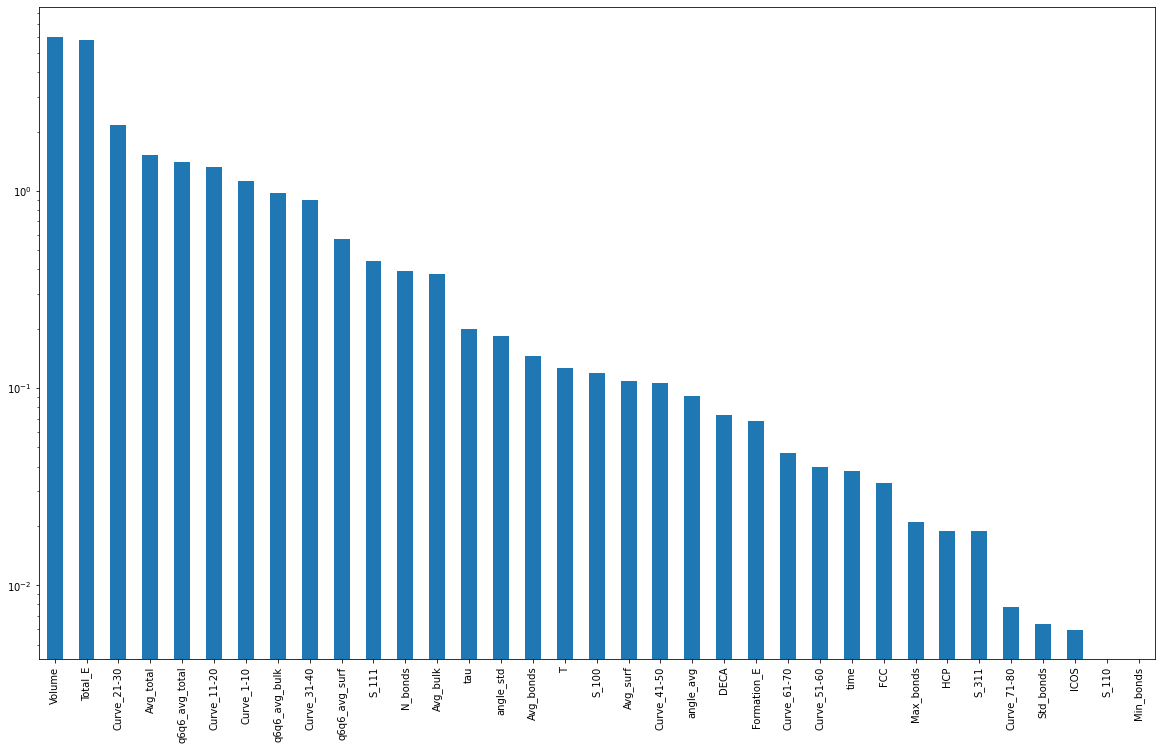

In [33]:
plt.figure(figsize=(20, 12))
shap_values_abs_df_describe_sorted.loc['mean'].plot(kind='bar',logy=True)
plt.show()

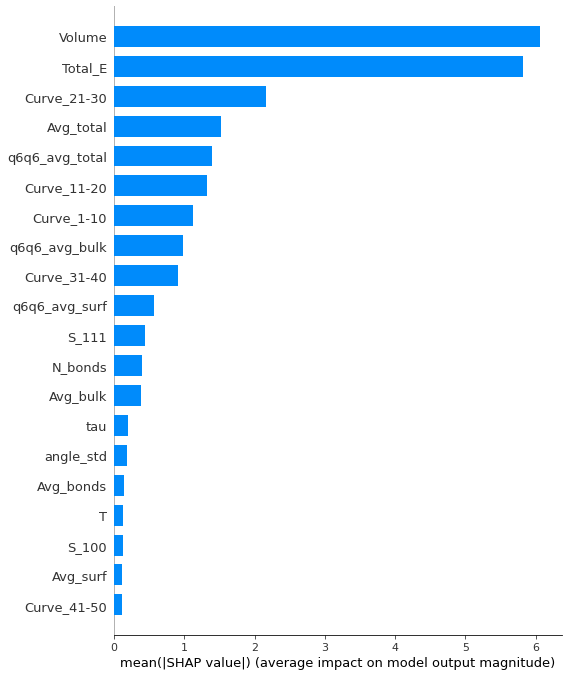

In [34]:
#SHAP API for the above bar plot -same results but nnot in log scale
shap.summary_plot(shap_values, features_test_df, plot_type="bar")

In [35]:
print(features_test.shape)
print(predictions_list['test'][0]) # predicted value
print(labels_test[0]) #original labels
print(set_d)

(400, 35)
19.29190364099256
[19.7274]
['train', 'val', 'test']


In [36]:
test_residu = []
for i in range(labels_test.shape[0]):
    test_residu.append((labels_test[i] - predictions_list['test'][i])[0])

In [37]:
test_residu_np = np.array(test_residu)
test_residu_np_abs = np.abs(test_residu_np)
print(test_residu_np.shape)
print(test_residu_np_abs.sum()/400) #sanity test to check if we get the MAE loss correctly
sorted_indices = np.argsort(test_residu_np_abs)
print(sorted_indices[:10])

(400,)
0.34809815680738054
[229  46  44 343 163 128 312  71 373 316]


In [38]:
len(sorted_indices) #numbe of test samples
samples_ = (labels_test.shape[0]*10)//100 # number of samples for 10%
worst_set_ind = sorted_indices[-1*samples_:] # worst 10% - when ascending order based sorted, highest values are in the right side
best_set_ind = sorted_indices[:samples_] # best 10% - when ascending order based sorted, smallest values are to the left

#we need the corrosponding shap values
best_10 = shap_values[best_set_ind]
worst_10 = shap_values[worst_set_ind]

print(best_10.shape)
print(worst_10.shape)

best_10_values = test_residu_np[list(best_set_ind)] #best 10% of residual values - closest to zero
worst_10_values = test_residu_np[list(worst_set_ind)] #worst 10% of residual values - furthest from zero

print(best_10_values.shape)
print(worst_10_values.shape)

(40, 35)
(40, 35)
(40,)
(40,)


In [39]:
best_10_values

array([ 0.00044648,  0.00099605, -0.00184002, -0.00407253,  0.00543172,
        0.00565447, -0.00621966, -0.00732921, -0.00895805, -0.0089891 ,
       -0.010446  ,  0.01237147,  0.01288698,  0.01318292,  0.01328146,
        0.01595452,  0.0194579 ,  0.01983235, -0.02248961,  0.02260496,
        0.02282252,  0.02348659, -0.02428217, -0.02484339,  0.02550661,
        0.02744052,  0.02800015, -0.0283202 , -0.02836838,  0.02913435,
        0.02958024, -0.03096905, -0.03099613, -0.03183782, -0.03322627,
       -0.0336008 , -0.03413578,  0.03459996, -0.03487642, -0.03539482])

In [40]:
worst_10_values

array([ 0.70977292, -0.72676358, -0.7348047 ,  0.74678755,  0.74927401,
        0.76899761,  0.76993764,  0.7933569 ,  0.8065848 ,  0.81454629,
       -0.81929055,  0.85950428,  0.85969646, -0.88650149, -0.90354663,
       -0.90594735,  0.9194891 ,  0.92259125, -0.93151269,  0.96539489,
        0.97588663,  0.99305414, -1.00319523, -1.03893959, -1.07478227,
       -1.0965177 ,  1.09758598, -1.11380109,  1.17302303, -1.20890718,
       -1.21806912,  1.23408213,  1.26650411,  1.30888289,  1.31384534,
        1.65379226,  1.69686782, -2.10411601, -2.49953338, -2.62921702])

### Best/Worst distribution on residual plots

In [ ]:
##

# SHAP results

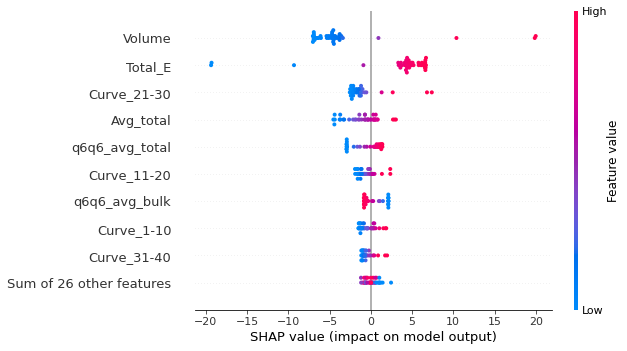

In [41]:
shap.plots.beeswarm(best_10,max_display=10)

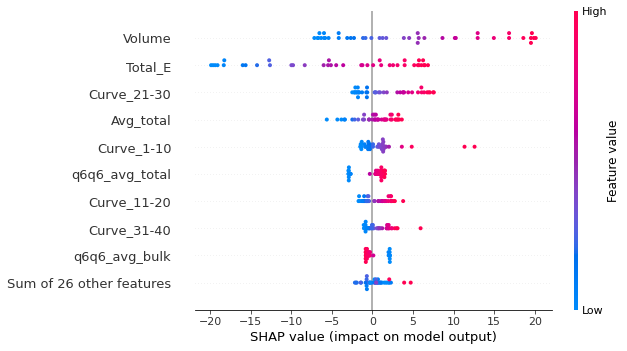

In [42]:
shap.plots.beeswarm(worst_10,max_display=10)

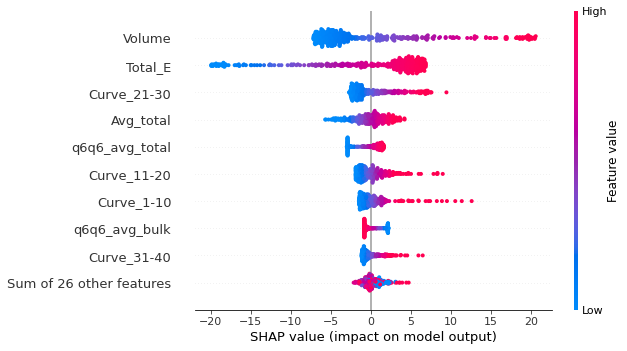

In [43]:
shap.plots.beeswarm(shap_values,max_display=10)

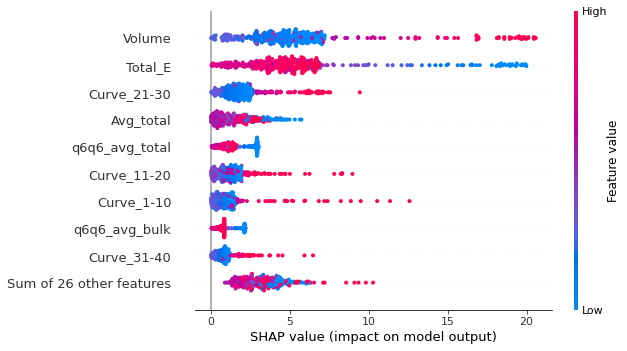

In [44]:
shap.plots.beeswarm(shap_values.abs, max_display=10)

In [49]:
shap_values[12]


.values =
array([ 2.10384811e-01, -1.75127418e-01, -2.77452873e-02, -4.53264595e+00,
       -6.73832374e-02, -5.02534129e-01, -0.00000000e+00,  1.09527349e-02,
       -1.25893941e+00,  1.56444105e-01, -1.19128188e+00, -6.31295939e-01,
       -6.67001446e-02,  1.13268563e-02, -3.62237029e-02, -4.02627789e-03,
       -1.06498194e+00,  7.58324316e-01,  1.04696899e-01,  4.49101203e+00,
       -1.63596031e-02, -2.04269543e-01, -1.12138560e-02,  1.88485563e-02,
       -0.00000000e+00,  2.97439599e-01, -1.12529639e-01, -2.86177617e-01,
        2.99675575e-02, -1.54887322e-02,  1.81389629e-03,  6.00244085e-02,
       -2.91517739e+00,  2.10604672e+00,  1.08753573e+00])

.base_values =
array([21.2146238])

.data =
array([0.92857143, 0.        , 1.        , 0.09579832, 0.        ,
       0.00338219, 0.01864898, 0.00928793, 0.01948052, 0.18143813,
       0.12736773, 0.04873752, 0.07051282, 0.08888889, 0.        ,
       0.        , 0.55554653, 0.21376162, 0.5163688 , 0.91192593,
       0.1489508 ,

### SHAP for a given sample

In [55]:
shap_values[12].base_values[0]

21.214623798789038

In [62]:
shap.plots.waterfall(shap_values[12])
###check this later

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [64]:
print(labels_test[12])
print(labels_test[12] - predictions_list['test'][12])
print(predictions_list['test'][12])
print(sum(predictions_list['test'])/400)
# print(sum(labels_test)/400)

[17.5341]
[0.09475969]
17.439340310663457
21.37746624631073


# SHAP Full view

In [65]:
features_num = best_10.shape[1]

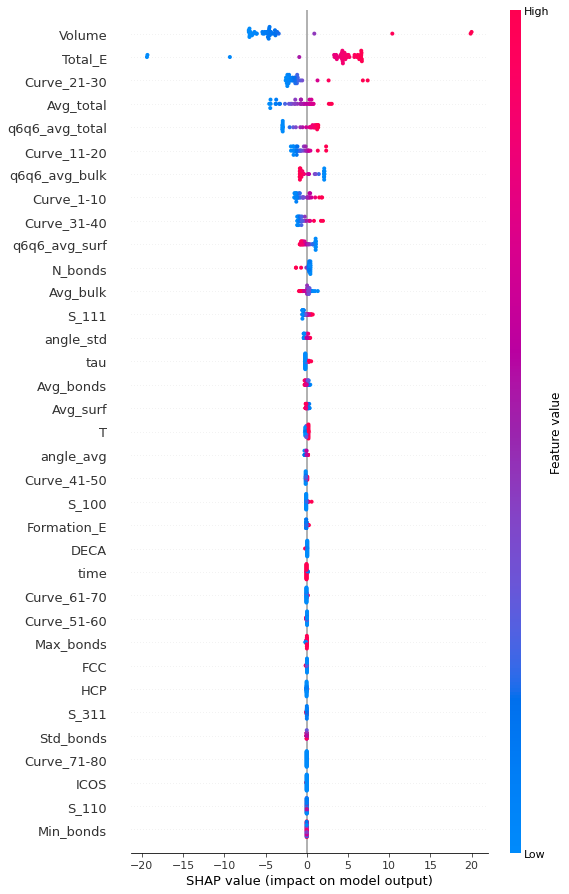

In [66]:
shap.plots.beeswarm(best_10,max_display=features_num)

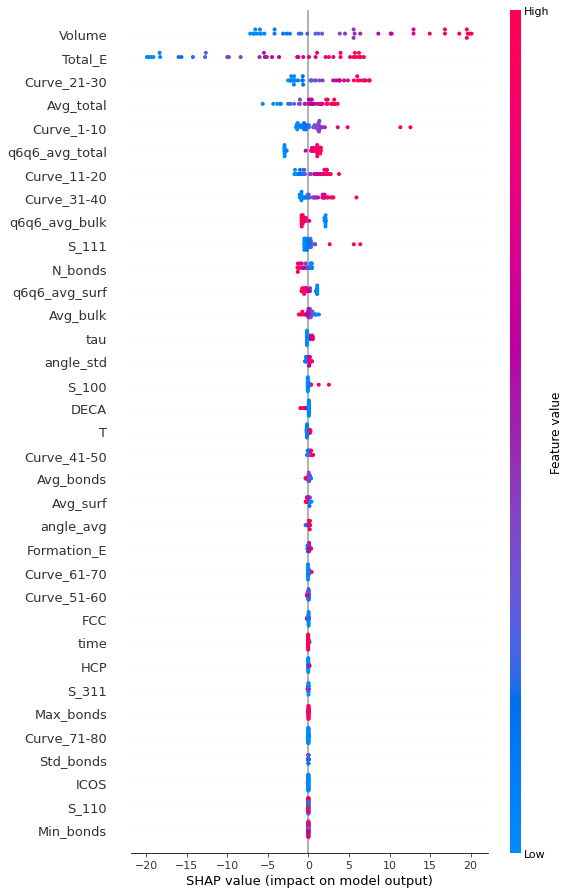

In [67]:
shap.plots.beeswarm(worst_10,max_display=features_num)

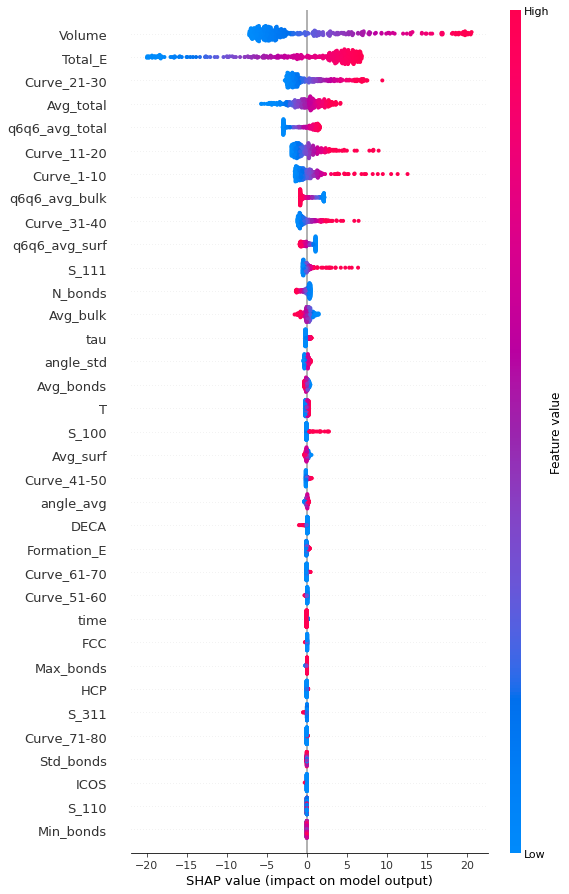

In [68]:
shap.plots.beeswarm(shap_values,max_display=features_num)

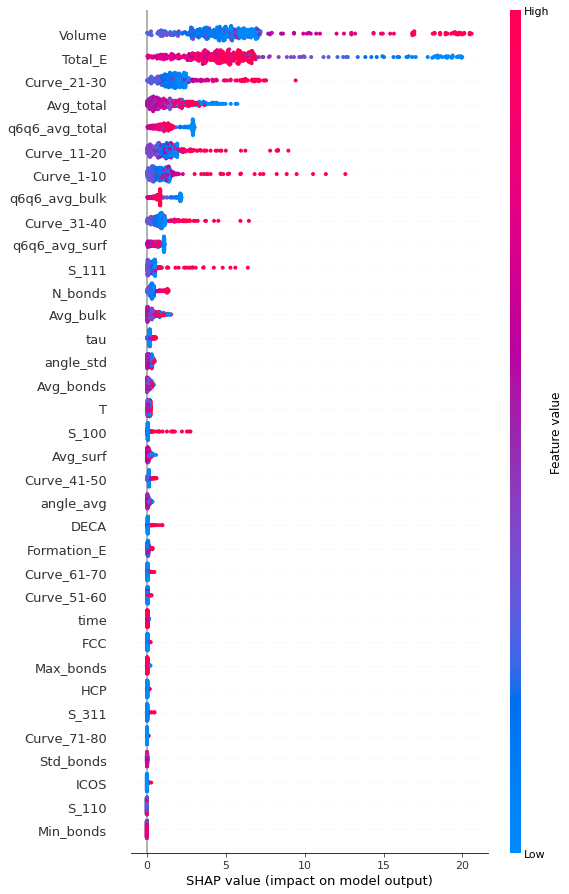

In [69]:
shap.plots.beeswarm(shap_values.abs, max_display=features_num)
